Morphological operators

In [2]:
!pip install scikit-image

  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/50/b2/d5e97115733e2dc657e99868ae0237705b79d0c81f6ced21b8f0799a30d1/scikit_image-0.24.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.9 from https://files.pythonhosted.org/packages/ea/c2/5ecadc5fcccefaece775feadcd795060adf5c3b29a883bff0e678cfe89af/scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 2.7 MB/s eta 0:00:01
     --------------------------------- ------ 51.2/60.8 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 543.4 kB/s eta 0:00:00
  Obtaining dependency information for networkx>=2.8 from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for imageio>=2.33 


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import erosion, dilation, closing, opening, area_closing, area_opening
from skimage.color import rgb2gray

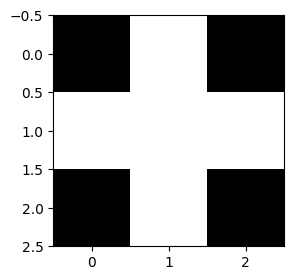

In [7]:
# What is a structuring element
element = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])
plt.figure(figsize=(4,3))
plt.imshow(element, cmap='gray')

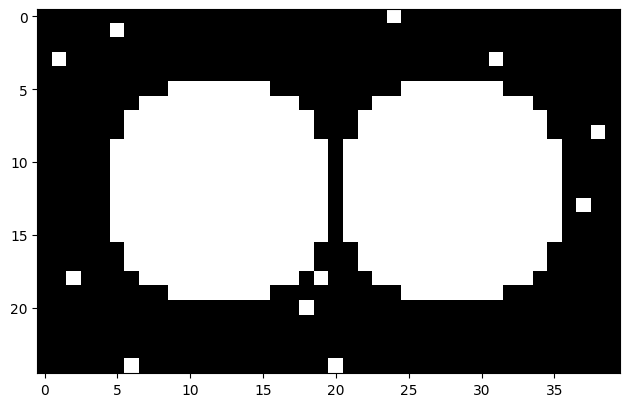

In [10]:
circle_image = np.zeros(shape=(25,40))
circle_image[disk((12,12), 8)] = 1
circle_image[disk((12,28), 8)] = 1
# noise
for x in range(20):
    circle_image[np.random.randint(25), np.random.randint(40)] = 1
imshow(circle_image)

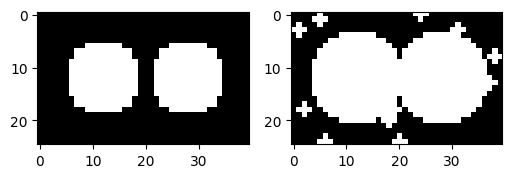

In [12]:
fig, ax = plt.subplots(1,2, figsize=(6,4))

ax[0].imshow(erosion(circle_image, element), cmap='gray')
ax[1].imshow(dilation(circle_image, element), cmap='gray')

In [44]:
element = np.zeros(shape=(4,4))
element =np.array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

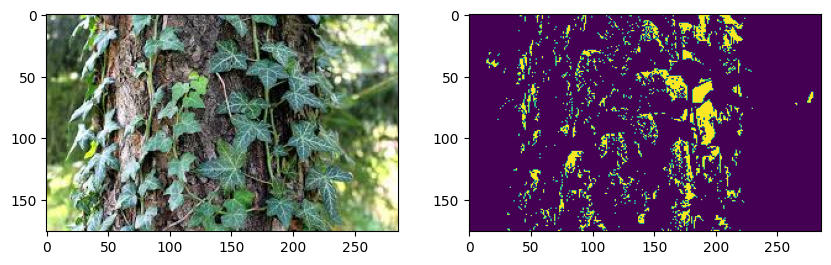

In [32]:
# On a real image
leaves = imread(r"C:\Users\DS23\Desktop\leaves.jfif")

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(leaves)
gray_leaves = rgb2gray(leaves)<0.15
ax[1].imshow(gray_leaves)

In [47]:
leaves.shape

(176, 286, 3)

In [45]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

In [48]:
# multi_erod = multi_ero(leaves, 2, element)
# imshow(multi_erod)

In [50]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 3.5 MB/s eta 0:00:11
   ---------------------------------------- 0.4/38.8 MB 5.0 MB/s eta 0:00:08
    --------------------------------------- 0.9/38.8 MB 6.8 MB/s eta 0:00:06
   - -------------------------------------- 1.3/38.8 MB 8.5 MB/s eta 0:00:05
   - -------------------------------------- 1.4/38.8 MB 8.2 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/38.8 MB 9.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/38.8 MB 9.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.2/38.8 MB 9.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.8 MB 10.3 MB/s eta 0:00:04
   ---- ------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import cv2

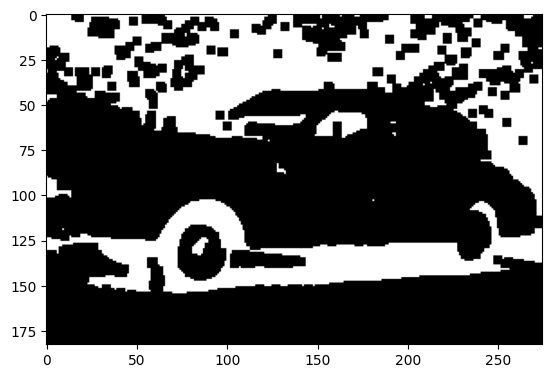

In [102]:
# Erosion
img = cv2.imread(r"C:\Users\DS23\Desktop\car.jfif",0) # "0" indicates it converts to grayscale
# binarize
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel = np.ones((5,5), np.uint8)
invert = cv2.bitwise_not(binr)
erosion = cv2.erode(invert, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')

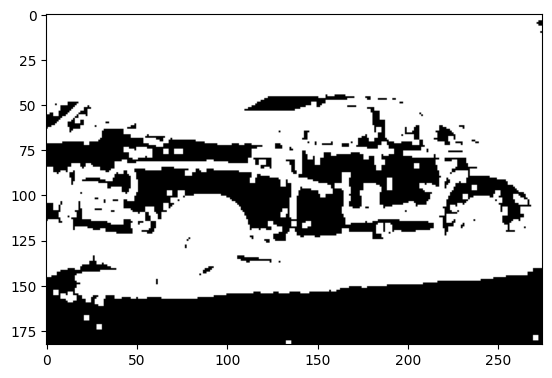

In [103]:
# Dilation
img = cv2.imread(r"C:\Users\DS23\Desktop\car.jfif",0) # "0" indicates it converts to grayscale
# binarize
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel = np.ones((3,3), np.uint8)
invert = cv2.bitwise_not(binr)
dilation = cv2.dilate(invert, kernel, iterations=1)
plt.imshow(dilation, cmap='gray')

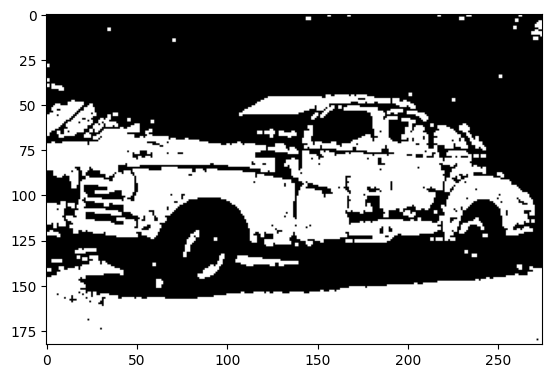

In [104]:
# Opening
img = cv2.imread(r"C:\Users\DS23\Desktop\car.jfif",0) # "0" indicates it converts to grayscale
# binarize
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel = np.ones((2,2), np.uint8)
# invert = cv2.bitwise_not(binr)
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening, cmap='gray')

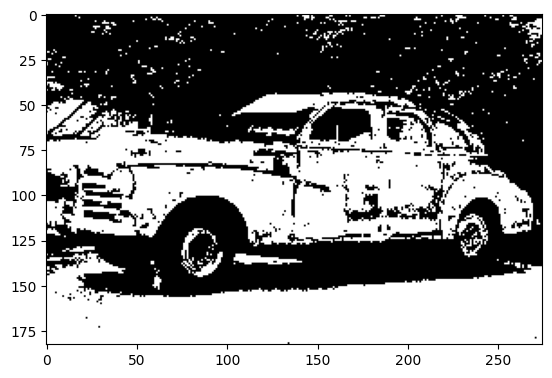

In [85]:
gr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(gr, cmap='gray')

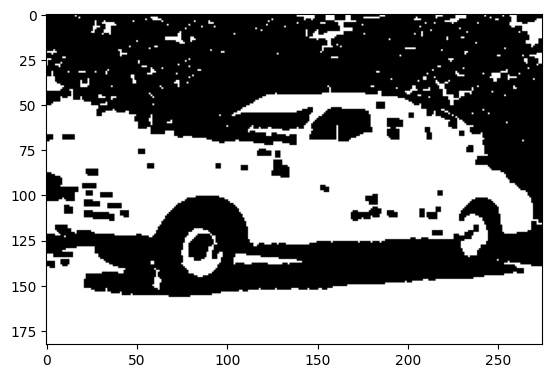

In [105]:
# closing
img = cv2.imread(r"C:\Users\DS23\Desktop\car.jfif",0) # "0" indicates it converts to grayscale
# binarize
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel = np.ones((3,3), np.uint8)
# invert = cv2.bitwise_not(binr)
closing = cv2.morphologyEx(binr,cv2.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(closing, cmap='gray')

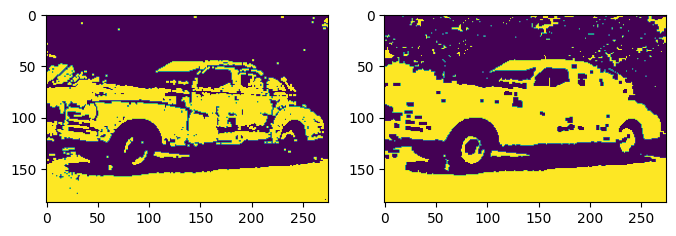

In [106]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(opening)
ax[1].imshow(closing)

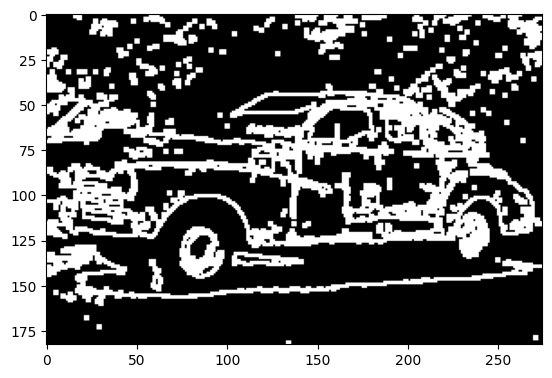

In [107]:
# Morph Gradient
img = cv2.imread(r"C:\Users\DS23\Desktop\car.jfif",0) # "0" indicates it converts to grayscale
# binarize
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel = np.ones((3,3), np.uint8)
invert = cv2.bitwise_not(binr)
morph_grad = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT, kernel, iterations=1)
plt.imshow(morph_grad, cmap='gray')